### Actor Critic
In Actor Critic, we fit the baseline to an estimator for state value. We use a model as given below.
![Actor Critic](./actor_critic.png)

In [1]:
from source import *
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import glob

### Environment - CartPole

state_shape: (4,)
n_actions:   2
state_dim:   4


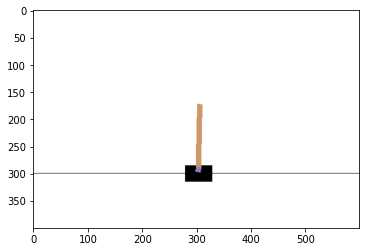

In [2]:
env_name = "CartPole-v1"
env = make_env(env_name)
env.reset()
plt.imshow(env.render("rgb_array"))
state_shape, n_actions = env.observation_space.shape, env.action_space.n
state_dim = state_shape[0]
env.close()
print(f"state_shape: {state_shape}")
print(f"n_actions:   {n_actions}")
print(f"state_dim:   {state_dim}")

In [3]:
model = ActorCritic(n_actions)
optimizer = tf.keras.optimizers.Adam()
train_episodes = 10_000

2022-08-02 08:04:59.742092: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Training

In [4]:
total_rewards = []
for i in range(10000):
    states, actions, rewards = generate_trajectory(env, model)
    reward = train_one_episode(states, actions, rewards, model, optimizer)
    total_rewards.append(reward)
    if i != 0 and i % 100 == 0:
        mean_reward = np.mean(total_rewards[-100:-1])
        print("mean reward:%.3f" % (mean_reward))
        if mean_reward > 700:
            break
env.close()

mean reward:46.091
mean reward:64.707
mean reward:148.535
mean reward:216.758
mean reward:371.970
mean reward:568.232
mean reward:844.990


#### Record video of trained agent

In [5]:
# animate learned policy
save_dir='./videos/actor_critic/'
env = make_env(env_name)
generate_animation(env, model, save_dir=save_dir)
[filepath] = glob.glob(os.path.join(save_dir, '*.mp4'))
display_animation(filepath)